In [1]:
#-----------------------------sentimental analysis-------------------------

In [2]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [3]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [4]:
# Making as Function
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html',
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [5]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [6]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [7]:
#We can even add in a a stop condition.
#For this one, we can tell Python to look for a greyed out “Next Page” button. To identify this element, use the element inspector.


In [8]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

<ipython-input-8-2e47bb25bda7>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [9]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,5.0,5.0 out of 5 stars\nValue for money,Its a value for money phone. it never disappo...,17 March 2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022
2,5.0,5.0 out of 5 stars\nGood,Good product,30 March 2024
3,5.0,5.0 out of 5 stars\nUsing 2 years with no issue..,The camera setup on the Nord CE 2 is versatile...,27 March 2024
4,4.0,4.0 out of 5 stars\nFor the money It is worth it,I recently purchased the OnePlus Nord CE 2 Lit...,26 January 2024
...,...,...,...,...
95,4.0,4.0 out of 5 stars\nNormal,Good,23 December 2023
96,5.0,5.0 out of 5 stars\nGood,Good 😊,8 March 2024
97,5.0,5.0 out of 5 stars\nValue for money,Must buy this one good for daily usage,28 February 2024
98,4.0,4.0 out of 5 stars\nGood phone-could have been...,I've purchased the 6GB version of this phone w...,19 December 2022


In [10]:
# save to Excel file
df.to_csv("Amazon_Reviews_Oneplus_Nord_CE2.csv")

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook


In [14]:
# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter


In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [16]:
# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer


In [18]:
# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# downloading stopwords corpus
nltk.download('all')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

In [20]:
# load the dataset
reviews=pd.read_csv('Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Rating,Title,Review,Review_Date
0,5.0,5.0 out of 5 stars\nValue for money,Its a value for money phone. it never disappo...,17 March 2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022
2,5.0,5.0 out of 5 stars\nGood,Good product,30 March 2024
3,5.0,5.0 out of 5 stars\nUsing 2 years with no issue..,The camera setup on the Nord CE 2 is versatile...,27 March 2024
4,4.0,4.0 out of 5 stars\nFor the money It is worth it,I recently purchased the OnePlus Nord CE 2 Lit...,26 January 2024
...,...,...,...,...
95,4.0,4.0 out of 5 stars\nNormal,Good,23 December 2023
96,5.0,5.0 out of 5 stars\nGood,Good 😊,8 March 2024
97,5.0,5.0 out of 5 stars\nValue for money,Must buy this one good for daily usage,28 February 2024
98,4.0,4.0 out of 5 stars\nGood phone-could have been...,I've purchased the 6GB version of this phone w...,19 December 2022


In [21]:
#-----------------------------Data Exploration----------------------------------------------------

In [22]:
reviews.Rating.describe()

count    100.000000
mean       4.190000
std        0.614554
min        3.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

In [23]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,Its a value for money phone. it never disappo...,34
1,The media could not be loaded.\n ...,559
2,Good product,2
3,The camera setup on the Nord CE 2 is versatile...,132
4,I recently purchased the OnePlus Nord CE 2 Lit...,374


In [24]:
reviews.head()

,Rating,Title,Review,Review_Date,word_count
0,5.0,5.0 out of 5 stars\nValue for money,Its a value for money phone. it never disappo...,17 March 2024,34
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022,559
2,5.0,5.0 out of 5 stars\nGood,Good product,30 March 2024,2
3,5.0,5.0 out of 5 stars\nUsing 2 years with no issue..,The camera setup on the Nord CE 2 is versatile...,27 March 2024,132
4,4.0,4.0 out of 5 stars\nFor the money It is worth it,I recently purchased the OnePlus Nord CE 2 Lit...,26 January 2024,374


In [25]:
#Number of characters
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,Its a value for money phone. it never disappo...,170
1,The media could not be loaded.\n ...,2791
2,Good product,12
3,The camera setup on the Nord CE 2 is versatile...,845
4,I recently purchased the OnePlus Nord CE 2 Lit...,2273


In [26]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,Its a value for money phone. it never disappo...,170
1,The media could not be loaded.\n ...,2791
2,Good product,12
3,The camera setup on the Nord CE 2 is versatile...,845
4,I recently purchased the OnePlus Nord CE 2 Lit...,2273


In [27]:
#-----------Average Word Length
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,Its a value for money phone. it never disappo...,4.281250
1,The media could not be loaded.\n ...,4.133581
2,Good product,5.500000
3,The camera setup on the Nord CE 2 is versatile...,5.409091
4,I recently purchased the OnePlus Nord CE 2 Lit...,5.080214


In [28]:
#Number of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,Its a value for money phone. it never disappo...,7
1,The media could not be loaded.\n ...,214
2,Good product,0
3,The camera setup on the Nord CE 2 is versatile...,42
4,I recently purchased the OnePlus Nord CE 2 Lit...,129


In [29]:
#Number of special characters
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,Its a value for money phone. it never disappo...,0
1,The media could not be loaded.\n ...,0
2,Good product,0
3,The camera setup on the Nord CE 2 is versatile...,0
4,I recently purchased the OnePlus Nord CE 2 Lit...,0


In [30]:
#Number of numerics
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,Its a value for money phone. it never disappo...,0
1,The media could not be loaded.\n ...,20
2,Good product,0
3,The camera setup on the Nord CE 2 is versatile...,2
4,I recently purchased the OnePlus Nord CE 2 Lit...,7


In [31]:
#Number of Uppercase words
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,Its a value for money phone. it never disappo...,2
1,The media could not be loaded.\n ...,8
2,Good product,0
3,The camera setup on the Nord CE 2 is versatile...,4
4,I recently purchased the OnePlus Nord CE 2 Lit...,21


In [32]:
reviews.head()

,Rating,Title,Review,Review_Date,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper
0,5.0,5.0 out of 5 stars\nValue for money,Its a value for money phone. it never disappo...,17 March 2024,34,170,4.281250,7,0,0,2
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022,559,2791,4.133581,214,0,20,8
2,5.0,5.0 out of 5 stars\nGood,Good product,30 March 2024,2,12,5.500000,0,0,0,0
3,5.0,5.0 out of 5 stars\nUsing 2 years with no issue..,The camera setup on the Nord CE 2 is versatile...,27 March 2024,132,845,5.409091,42,0,2,4
4,4.0,4.0 out of 5 stars\nFor the money It is worth it,I recently purchased the OnePlus Nord CE 2 Lit...,26 January 2024,374,2273,5.080214,129,0,7,21


In [34]:
# Dropping extra cols
reviews.drop(['numerics','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

In [35]:
reviews.head()

,Rating,Title,Review,Review_Date,hashtags
0,5.0,5.0 out of 5 stars\nValue for money,Its a value for money phone. it never disappo...,17 March 2024,0
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022,0
2,5.0,5.0 out of 5 stars\nGood,Good product,30 March 2024,0
3,5.0,5.0 out of 5 stars\nUsing 2 years with no issue..,The camera setup on the Nord CE 2 is versatile...,27 March 2024,0
4,4.0,4.0 out of 5 stars\nFor the money It is worth it,I recently purchased the OnePlus Nord CE 2 Lit...,26 January 2024,0


In [36]:
reviews.drop(['hashtags'],axis=1,inplace=True)

In [37]:
reviews.head()

,Rating,Title,Review,Review_Date
0,5.0,5.0 out of 5 stars\nValue for money,Its a value for money phone. it never disappo...,17 March 2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022
2,5.0,5.0 out of 5 stars\nGood,Good product,30 March 2024
3,5.0,5.0 out of 5 stars\nUsing 2 years with no issue..,The camera setup on the Nord CE 2 is versatile...,27 March 2024
4,4.0,4.0 out of 5 stars\nFor the money It is worth it,I recently purchased the OnePlus Nord CE 2 Lit...,26 January 2024


In [38]:
#Spelling correction
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Its a value for money  phone. it never disappo...
1    The media could not be loaded.\n              ...
2                                         Good product
3    The camera set on the Word of 2 is versatile, ...
4    I recently purchased the OnePlus Word of 2 Sit...
Name: Review, dtype: object

In [39]:
#---------------------------------Feature Engineering------------------------------------------
#Spliting Review Date into Three seperate Columns (Year,Month,Day)
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,17,March,2024
1,26,February,2022
2,30,March,2024
3,27,March,2024
4,26,January,2024
...,...,...,...
95,23,December,2023
96,8,March,2024
97,28,February,2024
98,19,December,2022


In [40]:
df.Month.value_counts()

March       34
January     33
February    24
December     7
October      2
Name: Month, dtype: int64

In [41]:
#Change 'month' from words to numbers for easier analysis
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,3
1,2
2,3
3,3
4,January
...,...
95,December
96,3
97,2
98,December


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       100 non-null    object 
 3   Review_Date  100 non-null    object 
 4   Date         100 non-null    object 
 5   Month        100 non-null    object 
 6   Year         100 non-null    object 
dtypes: float64(1), object(6)
memory usage: 5.6+ KB


In [43]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       100 non-null    object 
 3   Review_Date  100 non-null    object 
 4   Date         100 non-null    int64  
 5   Month        100 non-null    object 
 6   Year         100 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ KB


In [44]:
#Dropping the Original Columns after splitting the data

In [45]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,Date,Month,Year
0,5.0,5.0 out of 5 stars\nValue for money,Its a value for money phone. it never disappo...,17,3,2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26,2,2022
2,5.0,5.0 out of 5 stars\nGood,Good product,30,3,2024
3,5.0,5.0 out of 5 stars\nUsing 2 years with no issue..,The camera setup on the Nord CE 2 is versatile...,27,3,2024
4,4.0,4.0 out of 5 stars\nFor the money It is worth it,I recently purchased the OnePlus Nord CE 2 Lit...,26,January,2024


In [46]:
df

,Rating,Title,Review,Review_Date,Date,Month,Year
0,5.0,5.0 out of 5 stars\nValue for money,Its a value for money phone. it never disappo...,17 March 2024,17,March,2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022,26,February,2022
2,5.0,5.0 out of 5 stars\nGood,Good product,30 March 2024,30,March,2024
3,5.0,5.0 out of 5 stars\nUsing 2 years with no issue..,The camera setup on the Nord CE 2 is versatile...,27 March 2024,27,March,2024
4,4.0,4.0 out of 5 stars\nFor the money It is worth it,I recently purchased the OnePlus Nord CE 2 Lit...,26 January 2024,26,January,2024
...,...,...,...,...,...,...,...
95,4.0,4.0 out of 5 stars\nNormal,Good,23 December 2023,23,December,2023
96,5.0,5.0 out of 5 stars\nGood,Good 😊,8 March 2024,8,March,2024
97,5.0,5.0 out of 5 stars\nValue for money,Must buy this one good for daily usage,28 February 2024,28,February,2024
98,4.0,4.0 out of 5 stars\nGood phone-could have been...,I've purchased the 6GB version of this phone w...,19 December 2022,19,December,2022


In [47]:
df1

,Rating,Title,Review,Date,Month,Year
0,5.0,5.0 out of 5 stars\nValue for money,Its a value for money phone. it never disappo...,17,3,2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26,2,2022
2,5.0,5.0 out of 5 stars\nGood,Good product,30,3,2024
3,5.0,5.0 out of 5 stars\nUsing 2 years with no issue..,The camera setup on the Nord CE 2 is versatile...,27,3,2024
4,4.0,4.0 out of 5 stars\nFor the money It is worth it,I recently purchased the OnePlus Nord CE 2 Lit...,26,January,2024
...,...,...,...,...,...,...
95,4.0,4.0 out of 5 stars\nNormal,Good,23,December,2023
96,5.0,5.0 out of 5 stars\nGood,Good 😊,8,3,2024
97,5.0,5.0 out of 5 stars\nValue for money,Must buy this one good for daily usage,28,2,2024
98,4.0,4.0 out of 5 stars\nGood phone-could have been...,I've purchased the 6GB version of this phone w...,19,December,2022


In [48]:
#-------------------------------Data Visualization----------------------------------

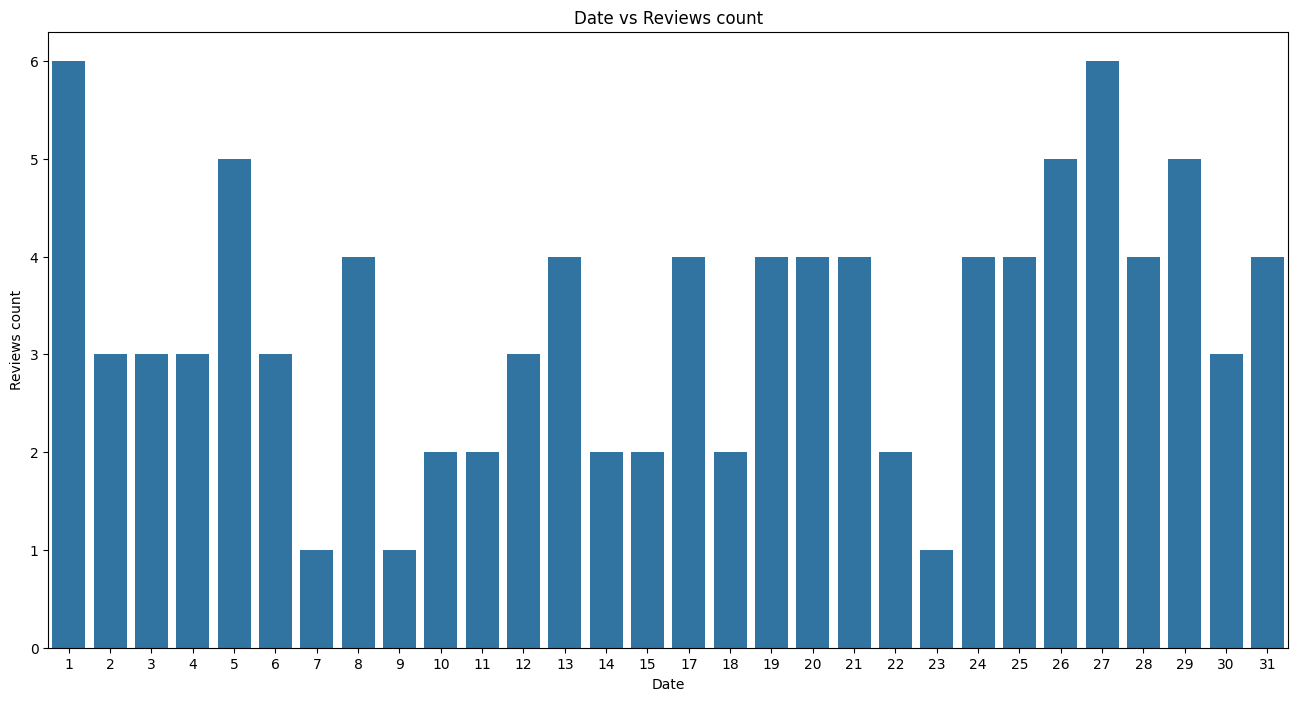

In [49]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

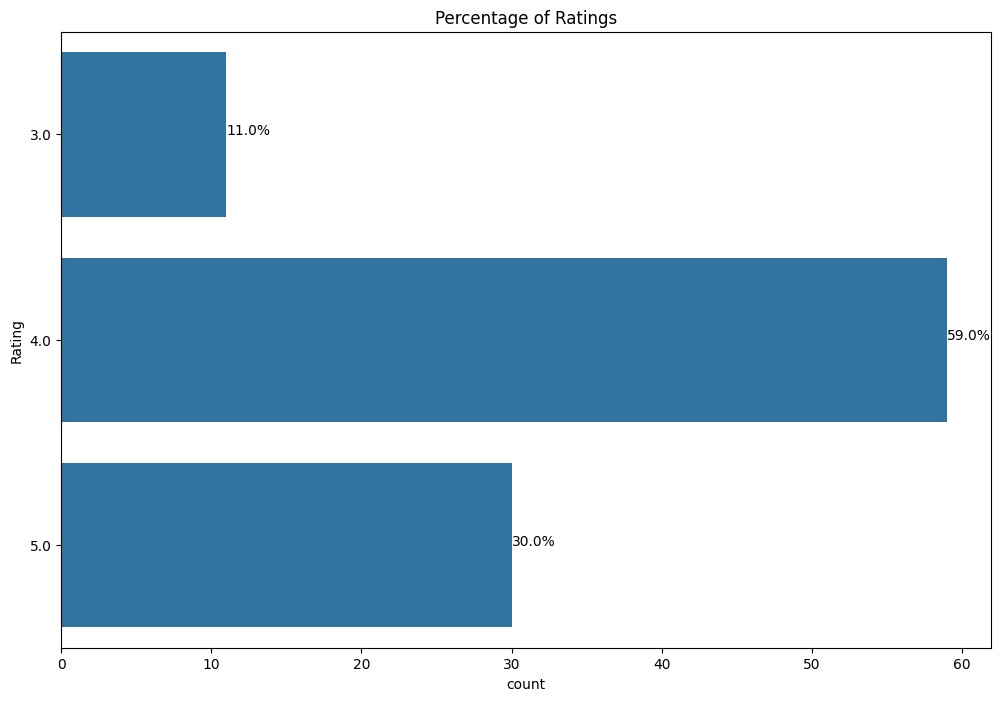

In [50]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [53]:
print(len(df['Rating'].value_counts().sort_index()))

3


In [54]:
df['Rating'].value_counts()

4.0    59
5.0    30
3.0    11
Name: Rating, dtype: int64

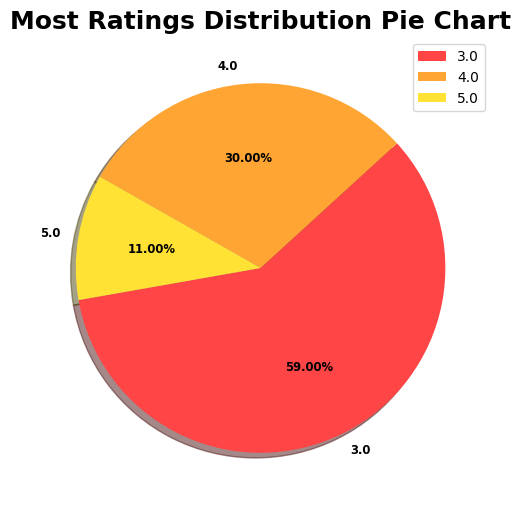

In [61]:
plt.figure(figsize = (10,6))
plt.pie(df['Rating'].value_counts(),
#print(len(df['Rating'].value_counts().sort_index())),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = [0.0,0.0,0.0],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [59]:
df['Month'].value_counts()

March       34
January     33
February    24
December     7
October      2
Name: Month, dtype: int64

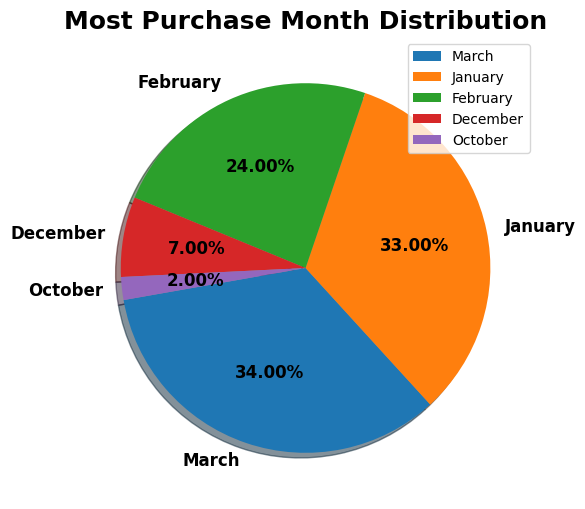

In [62]:
plt.figure(figsize = (10,6))
plt.pie(df['Month'].value_counts(),
       labels=df['Month'].value_counts().index,
       explode = [0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Purchase Month Distribution", fontsize = 18, fontweight = 'bold')
plt.show()

In [63]:
#---------------------------BasicText Preprocessing------------------------------------------
#A. For Sentiment Analysis

In [64]:
data = df[['Review']]
data

,Review
0,Its a value for money phone. it never disappo...
1,The media could not be loaded.\n ...
2,Good product
3,The camera setup on the Nord CE 2 is versatile...
4,I recently purchased the OnePlus Nord CE 2 Lit...
...,...
95,Good
96,Good 😊
97,Must buy this one good for daily usage
98,I've purchased the 6GB version of this phone w...


In [65]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [66]:
data

,Review
0,its value money phone. never disappointed me. ...
1,the media could loaded. build quality - rating...
2,good product
3,"the camera setup nord ce 2 versatile, offering..."
4,i recently purchased oneplus nord ce 2 lite 5g...
...,...
95,good
96,good 😊
97,must buy one good daily usage
98,i've purchased 6gb version phone comes extenda...


In [67]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/100 [00:00<?, ?it/s]

In [68]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,good product,Good product
3,camera setup nord ce versatile offering variet...,The camera setup on the Nord CE 2 is versatile...
4,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...


In [69]:
#--------------------------------Text Pre-processing Techniques--------------------------------
#Removing '@names'
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [70]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,good product,Good product
3,camera setup nord ce versatile offering variet...,The camera setup on the Nord CE 2 is versatile...
4,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
5,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
6,good performance fast charging decent battery ...,"Good performance, fast charging and decent bat..."
7,using phone month suppose giving good service ...,I have been using this phone for 6 months I su...
8,good phone,Very Good phone
9,good camera battery drain fast,good camera but battery drains too fast


In [71]:
#Removing links (http | https)
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,good product,Good product
3,camera setup nord ce versatile offering variet...,The camera setup on the Nord CE 2 is versatile...
4,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
5,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
6,good performance fast charging decent battery ...,"Good performance, fast charging and decent bat..."
7,using phone month suppose giving good service ...,I have been using this phone for 6 months I su...
8,good phone,Very Good phone
9,good camera battery drain fast,good camera but battery drains too fast


In [72]:
#Removing Review with empty text
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,good product,Good product
3,camera setup nord ce versatile offering variet...,The camera setup on the Nord CE 2 is versatile...
4,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
5,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
6,good performance fast charging decent battery ...,"Good performance, fast charging and decent bat..."
7,using phone month suppose giving good service ...,I have been using this phone for 6 months I su...
8,good phone,Very Good phone
9,good camera battery drain fast,good camera but battery drains too fast


In [73]:
#Dropping duplicate rows
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,good product,Good product
3,camera setup nord ce versatile offering variet...,The camera setup on the Nord CE 2 is versatile...
4,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
5,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
6,good performance fast charging decent battery ...,"Good performance, fast charging and decent bat..."
7,using phone month suppose giving good service ...,I have been using this phone for 6 months I su...
8,good phone,Very Good phone
9,good camera battery drain fast,good camera but battery drains too fast


In [74]:
#Resetting index
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,good product,Good product
3,camera setup nord ce versatile offering variet...,The camera setup on the Nord CE 2 is versatile...
4,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
5,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
6,good performance fast charging decent battery ...,"Good performance, fast charging and decent bat..."
7,using phone month suppose giving good service ...,I have been using this phone for 6 months I su...
8,good phone,Very Good phone
9,good camera battery drain fast,good camera but battery drains too fast


In [75]:
#Removing Punctuations, Numbers and Special characters
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [76]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,good product,Good product
3,camera setup nord ce versatile offering variet...,The camera setup on the Nord CE 2 is versatile...
4,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
5,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
6,good performance fast charging decent battery ...,"Good performance, fast charging and decent bat..."
7,using phone month suppose giving good service ...,I have been using this phone for 6 months I su...
8,good phone,Very Good phone
9,good camera battery drain fast,good camera but battery drains too fast


In [78]:
# Function to remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [79]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,good product,Good product
3,camera setup nord ce versatile offering variet...,The camera setup on the Nord CE 2 is versatile...
4,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
5,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
6,good performance fast charging decent battery ...,"Good performance, fast charging and decent bat..."
7,using phone month suppose giving good service ...,I have been using this phone for 6 months I su...
8,good phone,Very Good phone
9,good camera battery drain fast,good camera but battery drains too fast


In [80]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...,"[value, money, phone, never, disappointed, bes..."
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...,"[medium, could, loaded, build, quality, rating..."
2,good product,Good product,"[good, product]"
3,camera setup nord ce versatile offering variet...,The camera setup on the Nord CE 2 is versatile...,"[camera, setup, nord, ce, versatile, offering,..."
4,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...,"[recently, purchased, oneplus, nord, ce, lite,..."
5,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...,"[nord, ce, decent, choice, someone, looking, u..."
6,good performance fast charging decent battery ...,"Good performance, fast charging and decent bat...","[good, performance, fast, charging, decent, ba..."
7,using phone month suppose giving good service ...,I have been using this phone for 6 months I su...,"[using, phone, month, suppose, giving, good, s..."
8,good phone,Very Good phone,"[good, phone]"
9,good camera battery drain fast,good camera but battery drains too fast,"[good, camera, battery, drain, fast]"


In [81]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

In [83]:
#Removing Stop words
import codecs
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [84]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

In [85]:
for index, row in dataframe.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(' '.join(words_without_stopwords))

dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,good product,Good product
3,camera setup nord ce versatile offering variet...,The camera setup on the Nord CE 2 is versatile...
4,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
5,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
6,good performance fast charging decent battery ...,"Good performance, fast charging and decent bat..."
7,using phone month suppose giving good service ...,I have been using this phone for 6 months I su...
8,good phone,Very Good phone
9,good camera battery drain fast,good camera but battery drains too fast


In [86]:
#Tokenize 'Clean_Reviews'
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['medium', 'could', 'loaded', 'build', 'quality', 'rating', 'one', 'light', 'weight', 'phone', 'say', 'quite', 'comfortable', 'one', 'hand', 'usage', 'even', 'material', 'used', 'polycarbonate', 'get', 'job', 'done', 'matter', 'back', 'cover', 'term', 'styling', 'similar', 'oppo', 'phone', 'liked', 'recommend', 'gray', 'one', 'attache', 'fingerprint', 'going', 'use', 'back', 'cover', 'matterdisplay', 'rating', 'really', 'good', 'amoled', 'plan', 'hz', 'refresh', 'rate', 'work', 'well', 'wish', 'could', 'hz', 'bottom', 'chin', 'quite', 'thick', 'thing', 'yes', 'gorilla', 'glass', 'protection', 'screen', 'guard', 'pre', 'applied', 'panel', 'one', 'best', 'pretty', 'decent', 'wellperformance', 'rating', 'dimensity', 'ufs', 'lppdr', 'x', 'ram', 'get', 'job', 'done', 'regular', 'day', 'day', 'operation', 'played', 'game', 'say', 'considering', 'soc', 'pretty', 'good', 'expect', 'fps', 'stable', 'bgmi', 'cod', 'still', 'would', 'say', 'processor', 'good', 'competition', 'offering', 

In [87]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [value, money, phone, never, disappointed, bes...
1    [medium, could, loaded, build, quality, rating...
2                                      [good, product]
3    [camera, setup, nord, ce, versatile, offering,...
4    [recently, purchased, oneplus, nord, ce, lite,...
5    [nord, ce, decent, choice, someone, looking, u...
6    [good, performance, fast, charging, decent, ba...
7    [using, phone, month, suppose, giving, good, s...
8                                        [good, phone]
9                 [good, camera, battery, drain, fast]
Name: Clean_Reviews, dtype: object

In [88]:
#Converting words to Stemmer
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [89]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,valu money phone never disappoint best charg s...
1,medium could load build qualiti rate one light...
2,good product
3,camera setup nord ce versatil offer varieti sh...
4,recent purchas oneplus nord ce lite g stun blu...
...,...
94,good
95,good
96,must buy one good daili usag
97,purchas gb version phone come extend gb ram vi...


In [90]:
#Converting words to Lemma
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,stemmed
0,value money phone never disappointed best char...
1,medium could loaded build quality rating one l...
2,good product
3,camera setup nord ce versatile offering variet...
4,recently purchased oneplus nord ce lite g stun...
...,...
94,good
95,good
96,must buy one good daily usage
97,purchased gb version phone come extendable gb ...


In [91]:
#Basic Feature Extaction
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [95]:
print(tweetscv.toarray()[0:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [96]:
#CountVectorizer with N-grams (Bigrams & Trigrams)

In [97]:
#CountVectorizer with N-grams (Bigrams & Trigrams)from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/99 [00:00<?, ?it/s]

In [98]:
corpus[3]

'camera setup nord ce versatil offer varieti shoot mode featur captur stun photo video variou light condit may compet flagship level camera system certainli deliv impress result consid price point batteri life decent nord ce thank effici processor optim moder usag user easili get full day without need recharg time top fast charg support ensur minim downtim oneplu nord ce g offer excel valu money combin solid featur set capabl perform stylish design afford price compel option anyon market budget friendli smartphon without compromis qualiti function'

In [99]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [100]:
X.shape

(99, 3933)

In [102]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [105]:
count_df = pd.DataFrame(X,columns=cv.get_feature_names_out())
count_df

,abl,abl buy,abl buy phone,accur,accur date,accur date inform,acha,acha mobil,achiev,achiev hr,...,year last easili,year use,year use redmi,year without,year without problem,youtub,youtub instagram,youtub instagram facebook,youtub video,youtub video test
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
#TF-IDF Vectorizer
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/99 [00:00<?, ?it/s]

In [107]:
corpus[4]

'recent purchas oneplu nord ce lite g stun blue tide color equip gb ram gb storag overal experi posit notabl strength speed featur sound qualiti price speed oneplu nord ce lite g impress thank gb ram multitask breez app open run smoothli without notic lag devic g capabl add overal fast respons user experi make great choic priorit speed budget friendli phone term featur oneplu nord ce lite g disappoint come pack varieti function enhanc user experi devic offer well round set featur cater casual user tech enthusiast alik sound qualiti oneplu nord ce lite g surprisingli good price point audio output clear loud make enjoy medium consumpt game call phone speaker system deliv satisfi audio experi ad valu overal packag howev coupl drawback might signific user firstli screen bright overpow caus discomfort user case particularli problemat dad prolong usag led eye strain would benefici oneplu offer custom option screen bright cater individu prefer need outdoor camera perform oneplu nord ce lite g

In [108]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [109]:
#Named Entity Recognition (NER)
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'value money phone never disappointed best charging speed nice bettry life play pub g smooth extreme easily much heating issue medium could loaded build quality rating one light weight phone say quite comfortable one hand usage even material used polycarbonate get job done matter back cover term styling similar oppo phone liked recommend gray one attache fingerprint going use back cover matterdisplay rating really good amoled plan hz refresh rate work well wish could hz bottom chin quite thick thing yes gorilla glass protection screen guard pre applied panel one best pretty decent wellperformance rating dimensity ufs lppdr x ram get job done regular day day operation played game say considering soc pretty good expect fps stable bgmi cod still would say processor good competition offering better decide gaming matter next year last easily normal usagesoftware biggest con android based oxygen say future color oos overall quite stable bug still say lot wait android better ideacamera rating

In [110]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [111]:
for token in doc_block[:50]:
    print(token,token.pos_)

value NOUN
money NOUN
phone NOUN
never ADV
disappointed VERB
best ADV
charging VERB
speed NOUN
nice ADJ
bettry NOUN
life NOUN
play VERB
pub NOUN
g PROPN
smooth ADJ
extreme ADJ
easily ADV
much ADJ
heating NOUN
issue NOUN
medium NOUN
could AUX
loaded VERB
build VERB
quality NOUN
rating NOUN
one NUM
light ADJ
weight NOUN
phone NOUN
say VERB
quite ADV
comfortable ADJ
one NUM
hand NOUN
usage NOUN
even ADV
material NOUN
used VERB
polycarbonate NOUN
get NOUN
job NOUN
done VERB
matter NOUN
back ADV
cover NOUN
term NOUN
styling VERB
similar ADJ
oppo NOUN


In [112]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['done', 'camera', 'check', 'review', 'video', 'p', 'mp', 'ultratwide', 'camera', 'saying', 'others', 'offering', 'oneplus', 'managed', 'give', 'thingsbattery', 'rating', 'rate', 'percent', 'brightness', 'mode', 'excluding', 'gaming', 'give', 'hr', 'wifi', 'rest', 'remaining', 'wifi', 'battery', 'task', 'day', 'charging', 'take', 'minute', 'charge', 'percent', 'fastspeakers', 'speaker', 'quality', 'quality', 'rating', 'none', 'party', 'complained', 'voice', 'getting', 'conclude', 'buy', 'care', 'oneplus', 'want', 'try', 'oneplus', 'time', 'getting', 'price', 'rejected', 'miui', 'user', 'want', 'software', 'ad', 'notification', 'bloatwares', 'product', 'camera', 'setup', 'offering', 'variety', 'shooting', 'mode', 'feature', 'capture', 'photo', 'video', 'lighting', 'condition', 'compete', 'flagship', 'level', 'camera', 'system', 'delivers', 'result', 'considering', 'price', 'point', 'battery', 'life', 'decent', 'processor', 'optimization', 'usage', 'user', 'get', 'day', 'needing', 'time'

In [113]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,68
1,camera,29
2,battery,22
3,quality,18
4,day,14
5,product,14
6,feature,14
7,user,13
8,performance,13
9,charging,11


<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

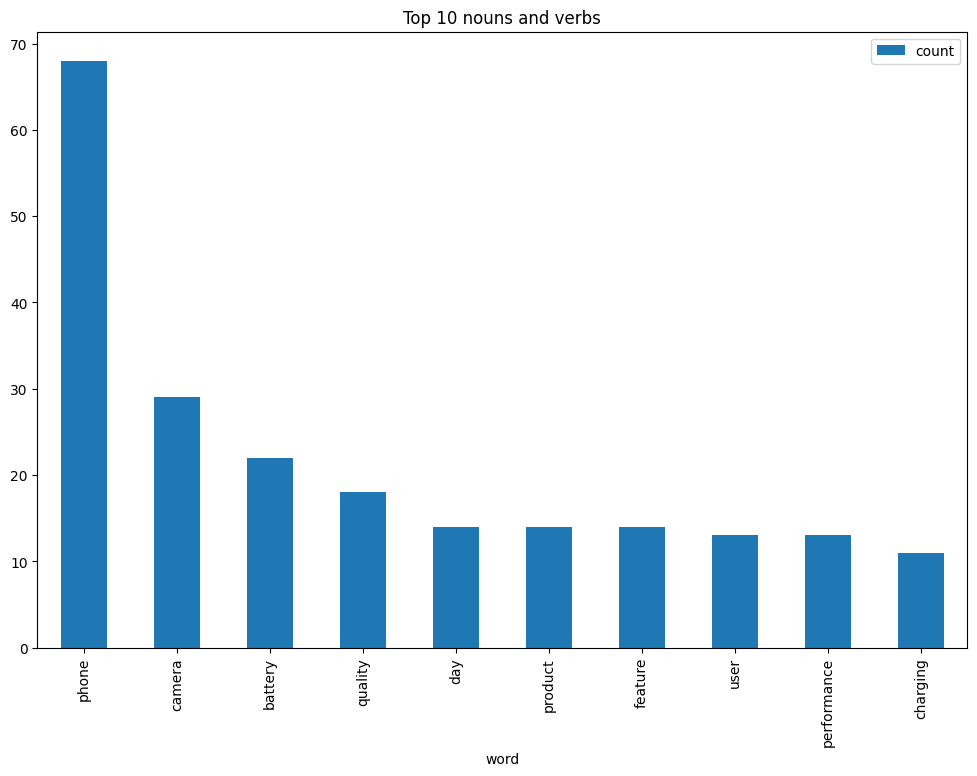

In [114]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

In [115]:
#Feature Extraction for 'Key Words'
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [116]:
#Fetch sentiments
#To proceed further, we need to know the sentiment type of every tweet, that can be done using two ways:
#a. Using NLTK's SentimentIntensityAnalyzer (We'll refer as SIA)
#b. Using TextBlob

In [117]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [118]:
#Using NLTK's SentimentIntensityAnalyzer
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,92
neg,7


In [119]:
dataframe.Clean_Reviews[8]

'good phone'

In [121]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}

In [123]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()


,Review,scores
0,value money phone never disappointed best char...,"{'neg': 0.116, 'neu': 0.449, 'pos': 0.434, 'co..."
1,medium could loaded build quality rating one l...,"{'neg': 0.029, 'neu': 0.666, 'pos': 0.305, 'co..."
2,good product,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp..."
3,camera setup nord ce versatile offering variet...,"{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp..."
4,recently purchased oneplus nord ce lite g stun...,"{'neg': 0.059, 'neu': 0.669, 'pos': 0.273, 'co..."


In [124]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()


,Review,scores
0,value money phone never disappointed best char...,"{'neg': 0.116, 'neu': 0.449, 'pos': 0.434, 'co..."
1,medium could loaded build quality rating one l...,"{'neg': 0.029, 'neu': 0.666, 'pos': 0.305, 'co..."
2,good product,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp..."
3,camera setup nord ce versatile offering variet...,"{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp..."
4,recently purchased oneplus nord ce lite g stun...,"{'neg': 0.059, 'neu': 0.669, 'pos': 0.273, 'co..."


In [126]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,value money phone never disappointed best char...,"{'neg': 0.116, 'neu': 0.449, 'pos': 0.434, 'co...",0.8012
1,medium could loaded build quality rating one l...,"{'neg': 0.029, 'neu': 0.666, 'pos': 0.305, 'co...",0.9977
2,good product,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404
3,camera setup nord ce versatile offering variet...,"{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp...",0.9875
4,recently purchased oneplus nord ce lite g stun...,"{'neg': 0.059, 'neu': 0.669, 'pos': 0.273, 'co...",0.9949


In [127]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,value money phone never disappointed best char...,"{'neg': 0.116, 'neu': 0.449, 'pos': 0.434, 'co...",0.8012,Positive
1,medium could loaded build quality rating one l...,"{'neg': 0.029, 'neu': 0.666, 'pos': 0.305, 'co...",0.9977,Positive
2,good product,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,Positive
3,camera setup nord ce versatile offering variet...,"{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp...",0.9875,Positive
4,recently purchased oneplus nord ce lite g stun...,"{'neg': 0.059, 'neu': 0.669, 'pos': 0.273, 'co...",0.9949,Positive
...,...,...,...,...
94,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,Positive
95,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,Positive
96,must buy one good daily usage,"{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...",0.4404,Positive
97,purchased gb version phone come extendable gb ...,"{'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...",0.9876,Positive


In [128]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')


/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<ipython-input-130-b3e96d257d7c>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='compound', ylabel='Density'>

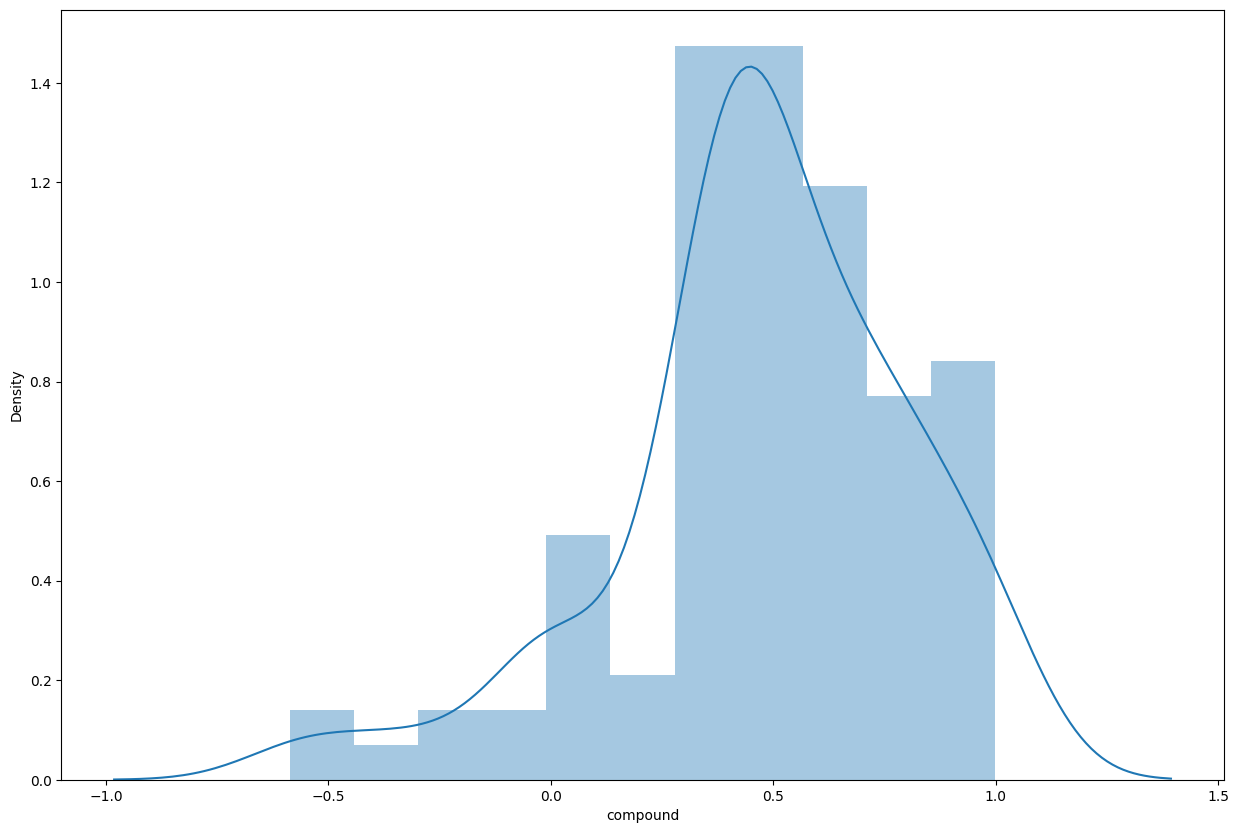

In [130]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

In [131]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [132]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,sentiment
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...,pos
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...,pos
2,good product,Good product,pos
3,camera setup nord ce versatile offering variet...,The camera setup on the Nord CE 2 is versatile...,pos
4,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...,pos


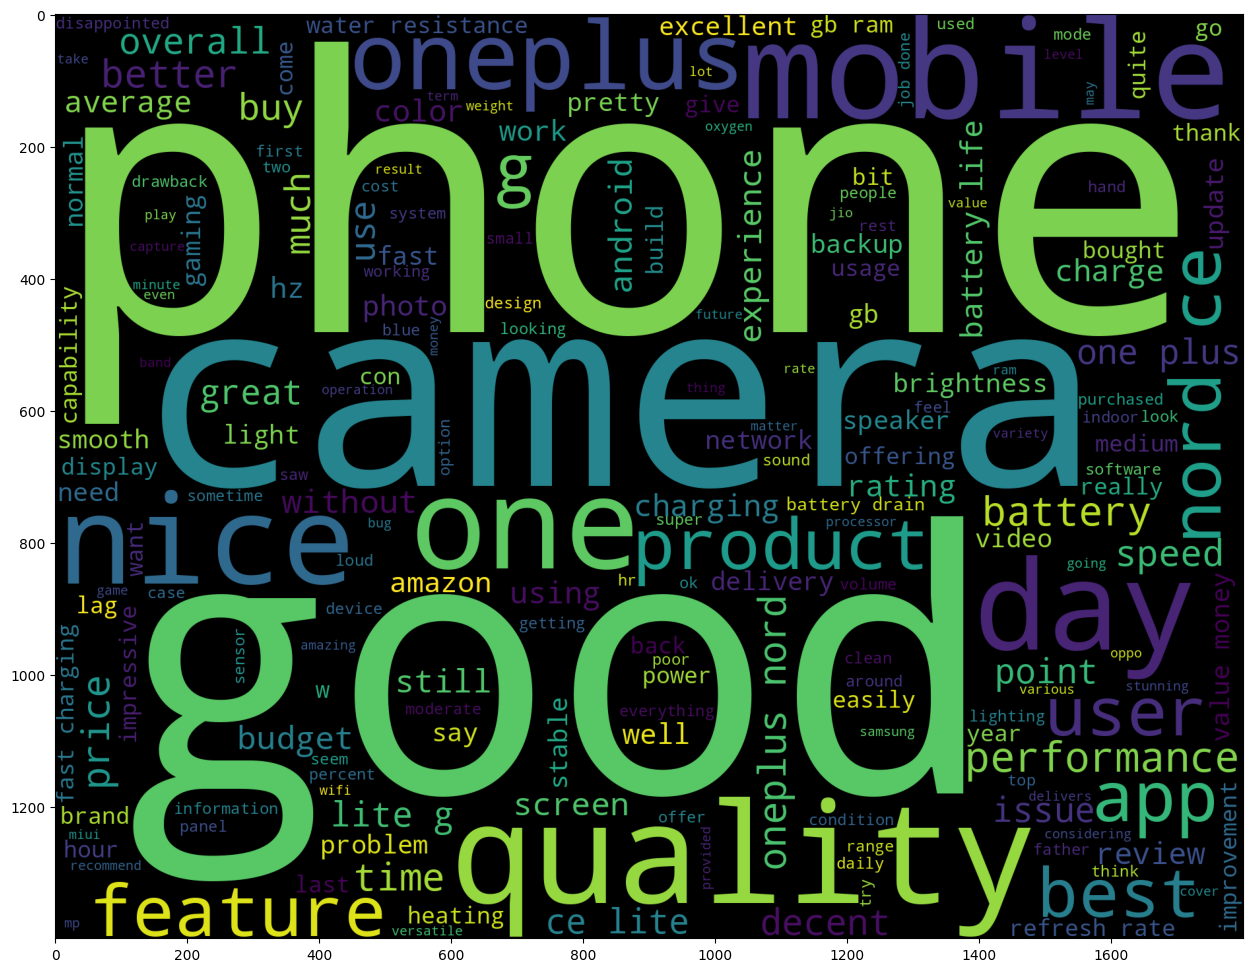

In [133]:
#Story Generation and Visualization
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

In [134]:
#Most common words in positive Review
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

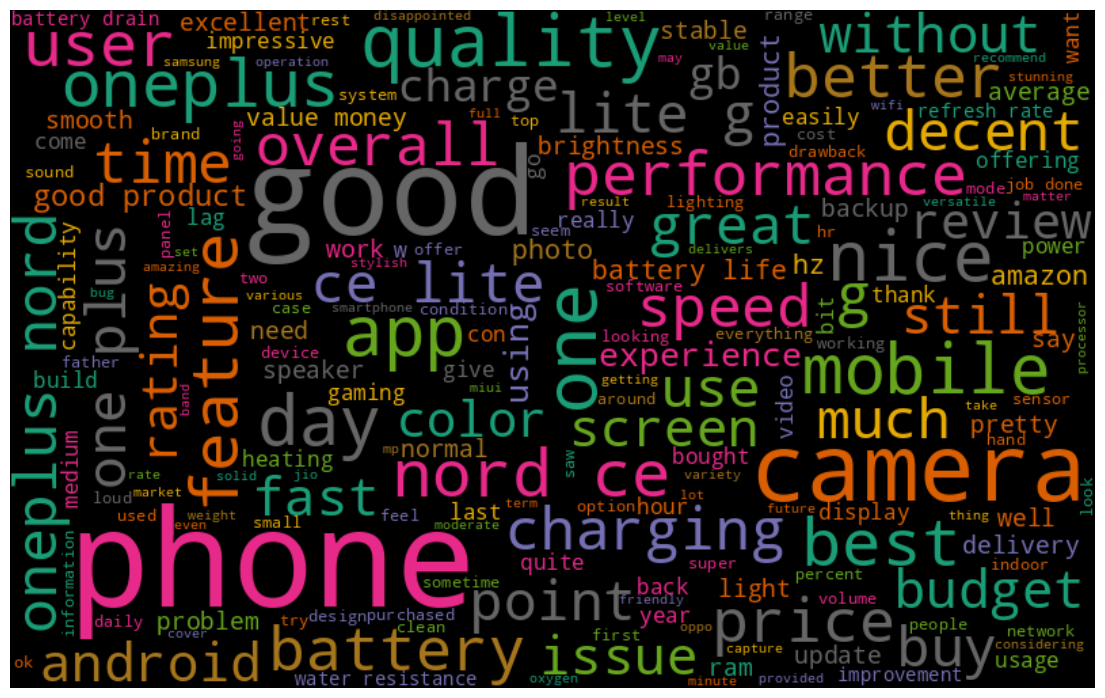

In [135]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

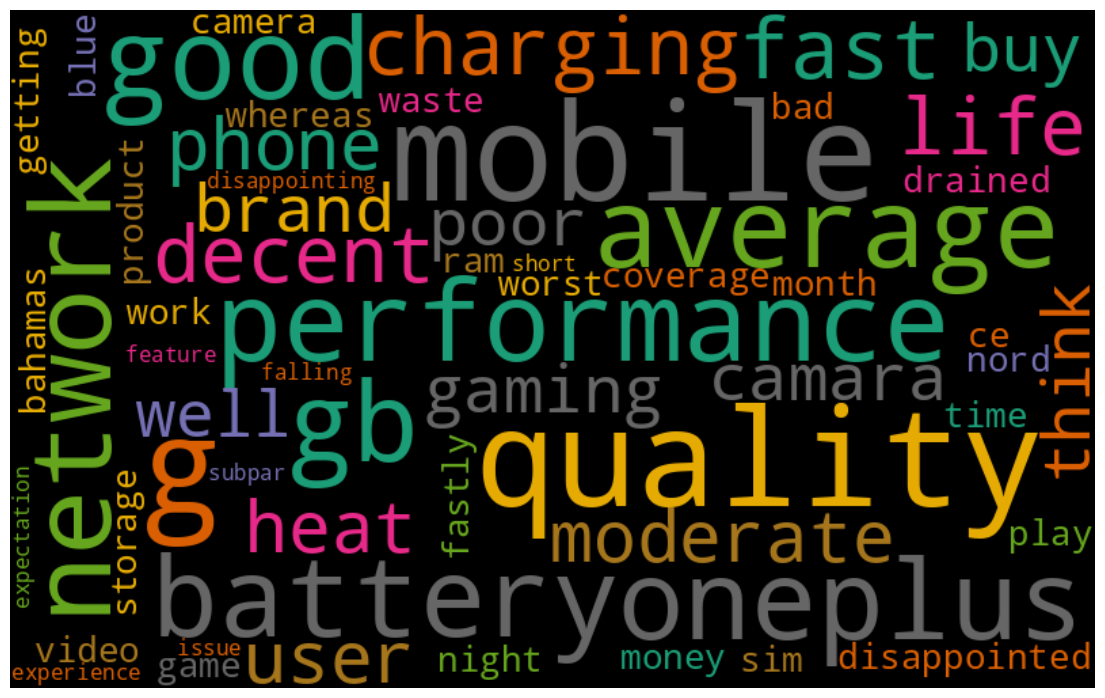

In [136]:
#Most common words in negative Review
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)